<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Simple_Mix_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Data Scource and Clean Up

In [0]:
# coaches salary data
coaches = pd.read_csv("https://raw.githubusercontent.com/ygeszvain/BigDataAnalytics/master/coaches9.csv")
coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417


In [0]:
# graduation success rate data
gs = pd.read_csv("https://raw.githubusercontent.com/ygeszvain/BigDataAnalytics/master/NCAAFootballGSR2006.csv")
gs.head()

# The NCAA Graduation Success Rate (GSR) is designed to show the proportion of student-athletes on any given team who earn a college degree. 
# The NCAA has imposed a new set of academic standards that seeks to hold teams and institutions accountable for how well a student-athlete 
# progresses toward a degree.

# The Federal Graduation Rate (FGR) is compiled by the U.S. Department of Education and is used as an indicator of academic success for 
# college student-athletes. FGR measures the percentage of first-time, full-time freshman who graduate within six years of entering their 
# original four-year institution.

,Cohort Year,School,Conference,Sport,State,GSR,FGR,ConfAbbr
0,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45.0,SAC
1,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59.0,SAC
2,2006,Alcorn State University,Southwestern Athletic Conf.,Football,MS,57,39.0,SAC
3,2006,Appalachian State University,Southern Conference,Football,NC,68,56.0,Sco
4,2006,Arizona State University,Pac-12 Conference,Football,AZ,67,52.0,Pac-12


In [0]:
# Algorithm to match strings
import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        #return "The strings are {} edits away".format(distance[row][col])
        return distance[row][col]

In [0]:
# create a dictionary base on string matching algorithm
matches1 = {}
coaches_school = coaches['School'].values
print(len(coaches_school))

gs_school = gs['School'].values
print(len(gs_school))

for elm in gs_school:
    for el in coaches_school:
        if levenshtein_ratio_and_distance(elm, el, ratio_calc=True) > 0.71:
            matches1[elm] = el

print(len(matches1))

129
242
29


In [0]:
# review the dictionary
print(matches1)

{'Appalachian State University': 'Appalachian State', 'Arkansas State University': 'Arkansas State', 'Boston College': 'Boston College', 'Central Michigan University': 'Central Michigan', 'Coastal Carolina University': 'Coastal Carolina', 'Colorado State University': 'Colorado State', 'Davidson College': 'Boston College', 'Eastern Michigan University': 'Eastern Michigan', 'Florida Atlantic University': 'Florida Atlantic', 'Florida International University': 'Florida International', 'Georgia Southern University': 'Georgia Southern', 'Louisiana Tech University': 'Louisiana Tech', 'Marist College': 'Boston College', 'Michigan State University': 'Michigan State', 'Mississippi State University': 'Mississippi State', 'New Mexico State University': 'New Mexico State', 'North Carolina A&T State University': 'North Carolina State', 'North Carolina State University': 'North Carolina State', 'Northern Illinois University': 'Northern Illinois', 'Oklahoma State University': 'Oklahoma State', 'San D

In [0]:
# match up the strings
gs["School"] = gs["School"].map(matches1)

In [0]:
# review the data after string matching
gs.head()

,Cohort Year,School,Conference,Sport,State,GSR,FGR,ConfAbbr
0,2006,NaN,Southwestern Athletic Conf.,Football,AL,40,45.0,SAC
1,2006,NaN,Southwestern Athletic Conf.,Football,AL,81,59.0,SAC
2,2006,NaN,Southwestern Athletic Conf.,Football,MS,57,39.0,SAC
3,2006,Appalachian State,Southern Conference,Football,NC,68,56.0,Sco
4,2006,NaN,Pac-12 Conference,Football,AZ,67,52.0,Pac-12


In [0]:
# Combine the coaches salary data and graduation success data
data1 = coaches.merge(gs, 
                        left_on='School', 
                        right_on='School', 
                        how='outer', 
                        suffixes=["","_2"] #since they are the same name, we need a suffix
                       )

In [0]:
data1

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Cohort Year,Conference_2,Sport,State,GSR,FGR,ConfAbbr
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,2006.0,Conference USA,Football,AL,60.0,55.0,C-USA
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,2006.0,Southern Conference,Football,NC,68.0,56.0,Sco
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,2000000.0,2025000.0,0.0,0.0,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arizona State,Pac-12,Herm Edwards,2000000.0,2000000.0,3010000.0,0.0,0.0,8166667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arkansas,SEC,Chad Morris,3500000.0,3500000.0,1000000.0,0.0,0.0,12500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arkansas State,Sun Belt,Blake Anderson,825000.0,825000.0,185000.0,25000.0,0.0,300000.0,2006.0,Sun Belt Conference,Football,AR,68.0,60.0,Sun Belt
9,Army,Ind.,Jeff Monken,932521.0,932521.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# remove rows if null values in school column
data1 = data1[pd.notnull(data1['School'])]

In [0]:
# review dataset
data1.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Cohort Year,Conference_2,Sport,State,GSR,FGR,ConfAbbr
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,2006.0,Conference USA,Football,AL,60.0,55.0,C-USA
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,2006.0,Southern Conference,Football,NC,68.0,56.0,Sco


In [0]:
# stadium size data set
stadiums = pd.read_html("http://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity",
                         index_col=0, attrs={"class":"wikitable"}, header=0)[0]
stadiums.head()

,Stadium,Capacity,City,State/Province,Home teams,Refs,Unnamed: 7
Image,,,,,,,
NaN,Michigan Stadium,107601,Ann Arbor,Michigan,Michigan Wolverines,[1],NaN
NaN,Beaver Stadium,106572,University Park,Pennsylvania,Penn State Nittany Lions,[2],NaN
NaN,Kyle Field,102733,College Station,Texas,Texas A&M Aggies,NaN,NaN
NaN,Neyland Stadium,102455,Knoxville,Tennessee,Tennessee Volunteers,[3],NaN
NaN,Tiger Stadium,102321,Baton Rouge,Louisiana,LSU Tigers,[4],NaN


In [0]:
# create a dictionary base on string matching algorithm
matches2 = {}
data1_school = data1['School'].values
print(len(data1_school))

stadiums_hteam = stadiums['Home teams'].values
print(len(stadiums_hteam))

for elm in stadiums_hteam:
    for el in data1_school:
        if levenshtein_ratio_and_distance(elm, el, ratio_calc=True) > 0.72:
            matches2[elm] = el

print(len(matches2))    


132
150
30


In [0]:
# review the dictionary
print(matches2)

{'Florida Gators': 'Florida State', 'Oklahoma Sooners': 'Oklahoma State', 'South Carolina Gamecocks': 'South Carolina', 'Florida State Seminoles': 'Florida State', 'Michigan State Spartans': 'Michigan State', 'Virginia Tech Hokies': 'Virginia Tech', 'North Carolina Tar Heels': 'North Carolina State', 'Mississippi State Bulldogs': 'Mississippi State', 'Oklahoma State Cowboys': 'Oklahoma State', 'Kansas State Wildcats': 'Kansas State', 'East Carolina Pirates': 'East Carolina', 'Northwestern Wildcats': 'Northwestern', 'Oregon State Beavers': 'Oregon State', 'Utah Utes': 'Utah State', 'Boston College Eagles': 'Boston College', 'Fresno State Bulldogs': 'Fresno State', 'Colorado State Rams.': 'Colorado State', 'Connecticut Huskies': 'Connecticut', "Louisiana-Lafayette Ragin' Cajuns": 'Louisiana-Lafayette', 'Washington State Cougars': 'Washington State', 'Northern Illinois Huskies': 'Northern Illinois', 'San Jose State Spartans': 'San Jose State', 'Louisiana-Monroe Warhawks': 'Louisiana-Monro

In [0]:
# match up the strings
stadiums["School"] = stadiums['Home teams'].map(matches2)

In [0]:
# review the data after string matching
stadiums.head()

,Stadium,Capacity,City,State/Province,Home teams,Refs,Unnamed: 7,School
Image,,,,,,,,
NaN,Michigan Stadium,107601,Ann Arbor,Michigan,Michigan Wolverines,[1],NaN,NaN
NaN,Beaver Stadium,106572,University Park,Pennsylvania,Penn State Nittany Lions,[2],NaN,NaN
NaN,Kyle Field,102733,College Station,Texas,Texas A&M Aggies,NaN,NaN,NaN
NaN,Neyland Stadium,102455,Knoxville,Tennessee,Tennessee Volunteers,[3],NaN,NaN
NaN,Tiger Stadium,102321,Baton Rouge,Louisiana,LSU Tigers,[4],NaN,NaN


In [0]:
# Combine datasets
data2 = data1.merge(stadiums, 
                        left_on='School', 
                        right_on='School', 
                        how='outer', 
                        suffixes=["","_3"] #since they are the same name, we need a suffix
                       )

In [0]:
# remove rows if null values in school column
data2 = data2[pd.notnull(data2['School'])]

In [0]:
# drop invalid columns and review data
data2 = data2.drop(['Refs','Unnamed: 7','Conference_2'], axis = 1)
data2.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Cohort Year,Sport,State,GSR,FGR,ConfAbbr,Stadium,Capacity,City,State/Province,Home teams
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,2006.0,Football,AL,60.0,55.0,C-USA,NaN,NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,2006.0,Football,NC,68.0,56.0,Sco,NaN,NaN,NaN,NaN,NaN


In [0]:
# find null values

data2.apply(lambda x: sum(x.isnull()),axis=0)

School              0
Conference          0
Coach               0
SchoolPay           0
TotalPay            0
Bonus               0
BonusPaid           0
AssistantPay        0
Buyout              0
Cohort Year       104
Sport             104
State             104
GSR               104
FGR               106
ConfAbbr          104
Stadium           101
Capacity          101
City              101
State/Province    101
Home teams        101
dtype: int64

# Data Transformation

In [0]:
# review data types for each column
data2.dtypes

School             object
Conference         object
Coach              object
SchoolPay         float64
TotalPay          float64
Bonus             float64
BonusPaid         float64
AssistantPay      float64
Buyout            float64
Cohort Year       float64
Sport              object
State              object
GSR               float64
FGR               float64
ConfAbbr           object
Stadium            object
Capacity           object
City               object
State/Province     object
Home teams         object
dtype: object

In [0]:
# clean up the value
data2.loc[data2['Capacity'] == '30,255 [33]', 'Capacity'] = 30255

In [0]:
# convert the data type for capacity
data2["Capacity"] = data2.Capacity.astype(float)

In [0]:
# review (again) data types for each column
data2.dtypes

School             object
Conference         object
Coach              object
SchoolPay         float64
TotalPay          float64
Bonus             float64
BonusPaid         float64
AssistantPay      float64
Buyout            float64
Cohort Year       float64
Sport              object
State              object
GSR               float64
FGR               float64
ConfAbbr           object
Stadium            object
Capacity          float64
City               object
State/Province     object
Home teams         object
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

# Label encoding ConfAbbr

lb_make = LabelEncoder()
data2["Conference_code"] = lb_make.fit_transform(data2["Conference"].astype(str))
data2[["Conference", "Conference_code"]].head(11)

,Conference,Conference_code
0,Mt. West,7
1,MAC,6
2,SEC,9
3,C-USA,4
4,Sun Belt,10
5,Pac-12,8
6,Pac-12,8
7,SEC,9
8,Sun Belt,10
9,Ind.,5


# Data Exploration

In [0]:
# review the size of the dataset
data2.shape

(134, 21)

In [0]:
# Statistical Summary of Numeric Variables
data2.describe()

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Cohort Year,GSR,FGR,Capacity,Conference_code
count,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,134.0,1.340000e+02,30.0,30.000000,28.000000,33.000000,134.000000
mean,2.382965e+06,2.389271e+06,7.258363e+05,1.007137e+05,0.0,6.814013e+06,2006.0,65.533333,54.321429,48315.545455,4.820896
std,1.891470e+06,1.895620e+06,6.642366e+05,2.060597e+05,0.0,9.968399e+06,0.0,14.170716,11.919649,18211.886529,3.209129
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2006.0,37.000000,37.000000,28562.000000,0.000000
25%,8.000000e+05,8.007510e+05,2.125000e+05,0.000000e+00,0.0,5.180752e+05,2006.0,56.000000,44.750000,30456.000000,2.000000
50%,1.865794e+06,1.950004e+06,6.250000e+05,2.000000e+04,0.0,2.760938e+06,2006.0,65.000000,54.500000,44500.000000,4.000000
75%,3.591250e+06,3.600625e+06,1.043750e+06,9.875000e+04,0.0,9.187500e+06,2006.0,74.250000,59.250000,61337.000000,8.000000
max,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,0.0,6.812500e+07,2006.0,98.000000,86.000000,88548.000000,10.000000


In [0]:
# find max amounts
print("Heighest of SchoolPay:       ", data2['SchoolPay'].max())
print("Heighest of TotalPay:       ", data2['TotalPay'].max())
print("Heighest of Bonus:       ", data2['Bonus'].max())
print("Heighest of BonusPaid:       ", data2['BonusPaid'].max())
print("Heighest of AssistantPay:       ", data2['AssistantPay'].max())
print("Heighest of Buyout:       ", data2['Buyout'].max())
print("Heighest of Capacity:       ", data2['Capacity'].max())

Heighest of SchoolPay:        8307000.0
Heighest of TotalPay:        8307000.0
Heighest of Bonus:        3100000.0
Heighest of BonusPaid:        1350000.0
Heighest of AssistantPay:        0.0
Heighest of Buyout:        68125000.0
Heighest of Capacity:        88548.0


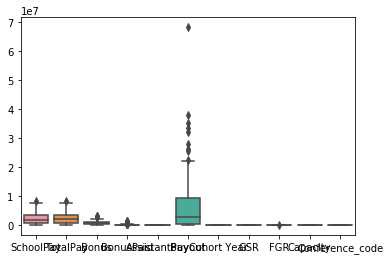

In [0]:
# Boxplot for all
sns.boxplot(data=data2)

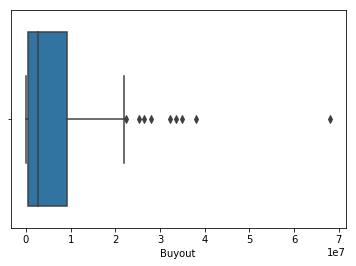

In [0]:
# Boxplot for Buyout
sns.boxplot(x=data2['Buyout'])

In [0]:
# identify Z score for buyout
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data2.Buyout))
print(z)

[0.7545344  0.67276286 3.23605928 0.29757579 0.49794671 0.43314229
 0.21540161 0.73006146 0.7189041  0.7545344  3.06310386 0.63810645
 0.7545344  0.16995765 0.7545344  0.7545344  0.7545344  0.6506773
 0.7545344  0.63329244 0.10160234 0.32845539 0.62092077 0.68845337
 0.08871605 3.40233402 0.69317106 0.47050458 0.19560695 0.63576673
 0.7545344  0.60805431 0.64170511 0.67067763 0.41604654 0.37618502
 1.85340563 1.85340563 0.10843828 2.561162   0.74463713 0.5763829
 0.27946372 0.7189041  0.5036377  0.74633157 0.51699906 1.90541601
 1.53669192 0.39823139 0.39823139 0.61795158 1.10121043 0.7545344
 0.45662553 0.43720203 0.73375006 0.91489365 0.12605544 0.52273459
 0.14927322 0.7189041  0.12810737 0.7545344  0.69250205 1.27771225
 0.07683928 0.03334348 0.34901523 0.7545344  0.7545344  0.52739123
 0.7545344  2.2641439  0.6476435  0.64170511 0.59974521 0.5724885
 0.69628691 0.02708243 0.02708243 0.22898746 0.53803068 0.7545344
 0.7545344  0.68822938 3.7655733  1.719792   1.17544022 1.17544022


In [0]:
# identify array for z score greater than 3 (outlier)
threshold = 3
print(np.where(z > 3))

(array([ 2, 10, 25, 86]),)


In [0]:
# locate the data
data2.iloc[110,]

School                Texas A&M
Conference                  SEC
Coach              Jimbo Fisher
SchoolPay               7.5e+06
TotalPay                7.5e+06
Bonus                  1.35e+06
BonusPaid                     0
AssistantPay                  0
Buyout               6.8125e+07
Cohort Year                 NaN
Sport                       NaN
State                       NaN
GSR                         NaN
FGR                         NaN
ConfAbbr                    NaN
Stadium                     NaN
Capacity                    NaN
City                        NaN
State/Province              NaN
Home teams                  NaN
Conference_code               9
Name: 110, dtype: object

In [0]:
# locate the data
data2.loc[data2['School'] == 'Texas A&M']

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Cohort Year,...,State,GSR,FGR,ConfAbbr,Stadium,Capacity,City,State/Province,Home teams,Conference_code
110,Texas A&M,SEC,Jimbo Fisher,7500000.0,7500000.0,1350000.0,0.0,0.0,68125000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [0]:
# Remove outlier
data2 = data2.drop([110])

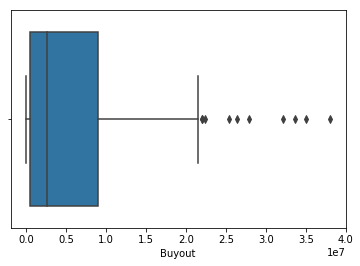

In [0]:
# Review Boxplot for Buyout after the outlier is removed
sns.boxplot(x=data2['Buyout'])

(0, 9000000)

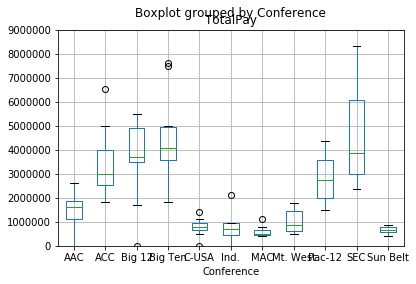

In [0]:
# TotalPay by conference
data2.boxplot(column='TotalPay', by = 'Conference')
plt.ylim(0, 9000000)

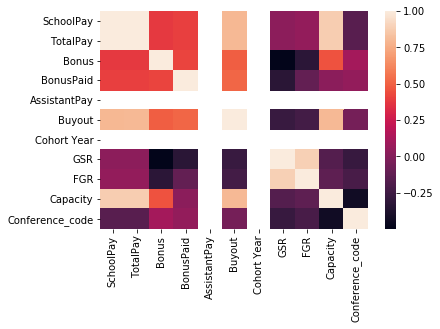

In [0]:
# Calculate correlations
corr = data2.corr()
 
# Heatmap
sns.heatmap(corr)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


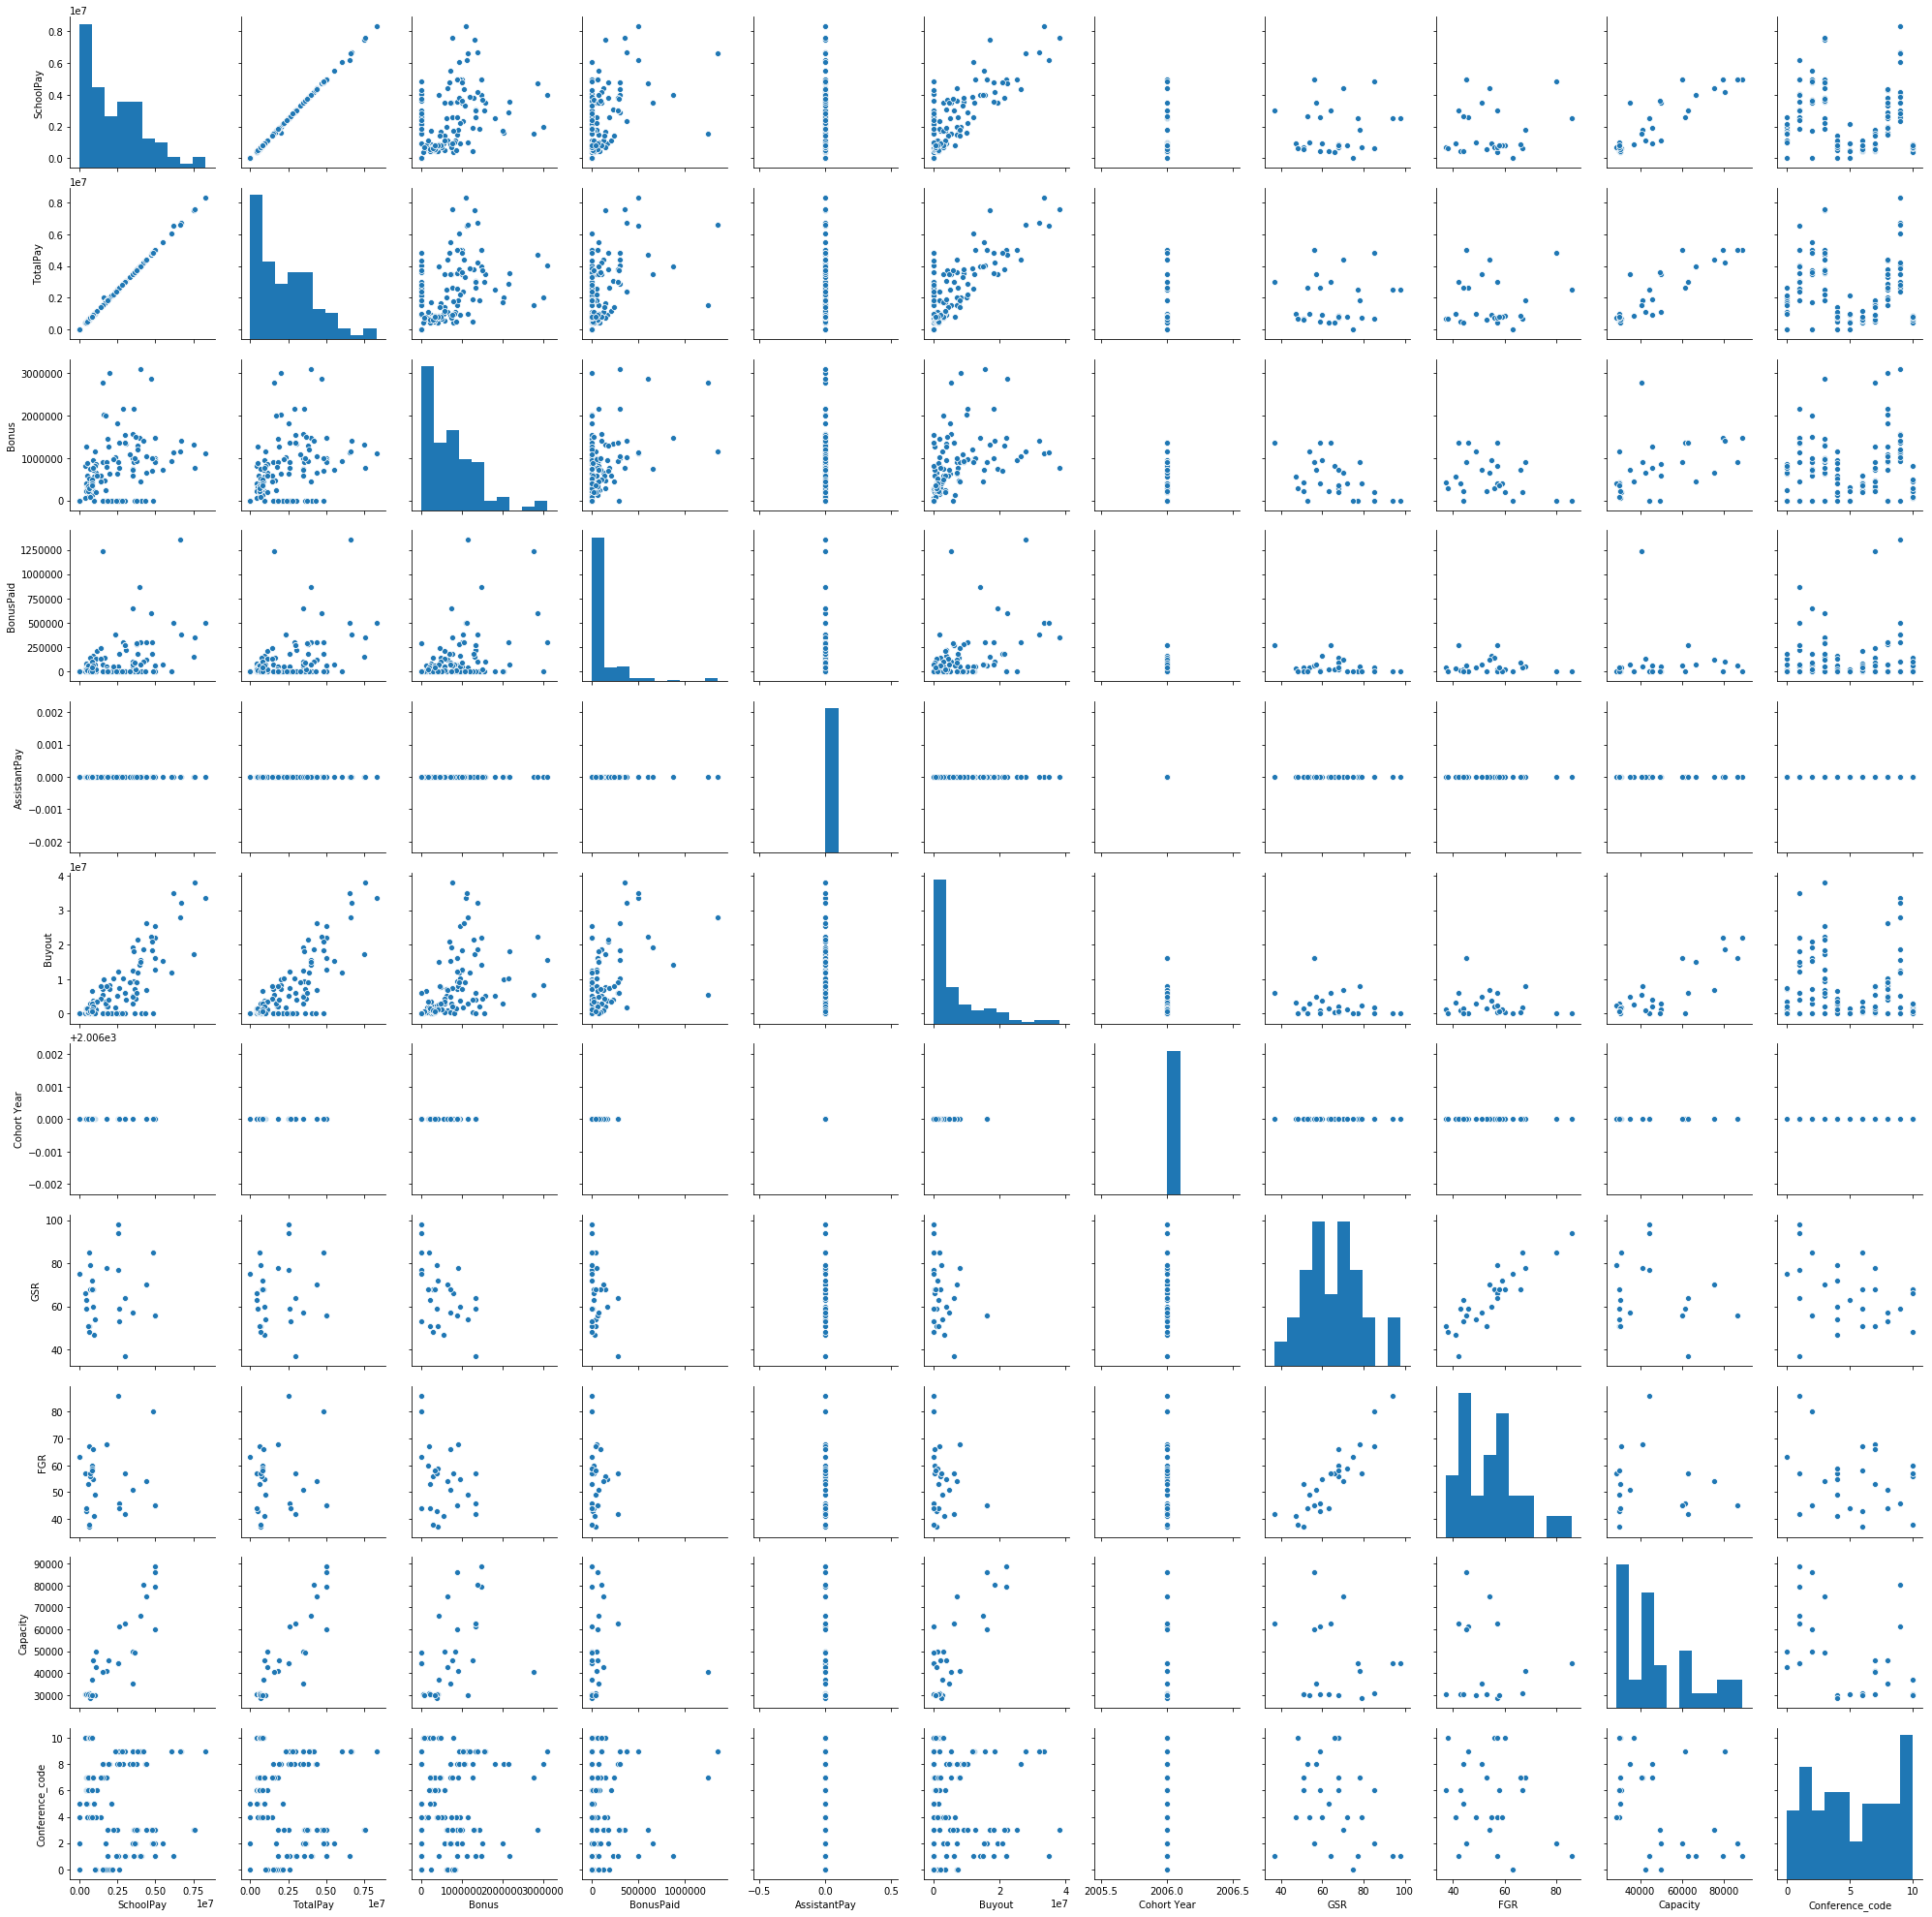

In [0]:
# pairplots showing the relationship and distribution
sns.pairplot(data2)

(0, 9000000)

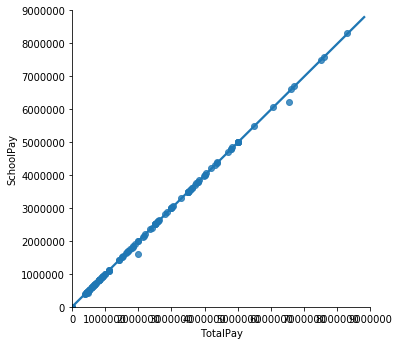

In [0]:
# plots showing distribution between TotalPay and SchoolPay
sns.lmplot(x='TotalPay', y='SchoolPay', data=data2)
plt.ylim(0, 9000000)
plt.xlim(0, 9000000)

(0, 9000000)

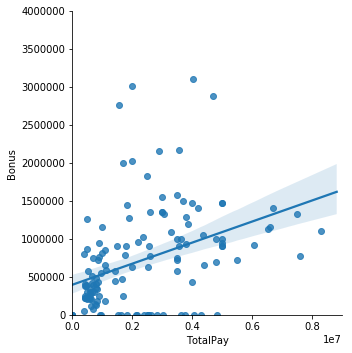

In [0]:
# plots showing distribution between TotalPay and Bonus
sns.lmplot(x='TotalPay', y='Bonus', data=data2)
plt.ylim(0, 4000000)
plt.xlim(0, 9000000)

(0, 3000000)

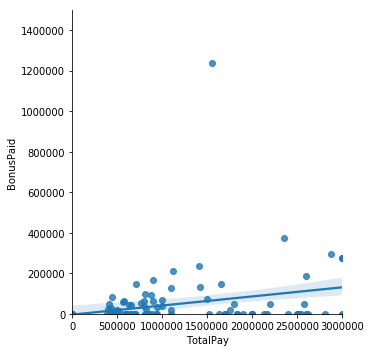

In [0]:
# plots showing distribution between TotalPay and BonusPaid
sns.lmplot(x='TotalPay', y='BonusPaid', data=data2)
plt.ylim(0, 1500000)
plt.xlim(0, 3000000)

(0, 1500000)

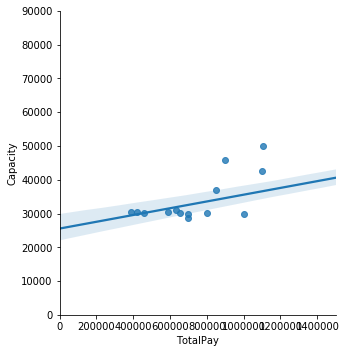

In [0]:
# plots showing distribution between TotalPay and Capacity
sns.lmplot(x='TotalPay', y='Capacity', data=data2)
plt.ylim(0, 90000)
plt.xlim(0, 1500000)

(0, 1500000)

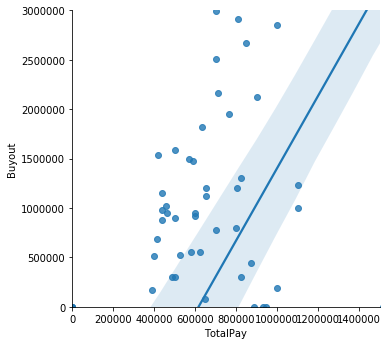

In [0]:
# plots showing distribution between TotalPay and Buyout
sns.lmplot(x='TotalPay', y='Buyout', data=data2)
plt.ylim(0, 3000000)
plt.xlim(0, 1500000)

# Data Predictive Model

**Model1 - Multiple Linear Regression**

In [0]:
# create training and test datasets
np.random.seed(1234)
data2['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(data2))
data2_train = data2[data2['runiform'] >= 0.33]
data2_test = data2[data2['runiform'] < 0.33]

In [0]:
# check training data frame
print('\SusItems_train data frame (rows, columns): ',data2_train.shape)
print(data2_train.head())

\SusItems_train data frame (rows, columns):  (94, 22)
                  School Conference              Coach  SchoolPay   TotalPay  \
1                  Akron        MAC       Terry Bowden   411000.0   412500.0   
2                Alabama        SEC         Nick Saban  8307000.0  8307000.0   
3  Alabama at Birmingham      C-USA         Bill Clark   900000.0   900000.0   
4      Appalachian State   Sun Belt  Scott Satterfield   712500.0   712500.0   
7               Arkansas        SEC        Chad Morris  3500000.0  3500000.0   

       Bonus  BonusPaid  AssistantPay      Buyout  Cohort Year  ...   GSR  \
1   225000.0    50000.0           0.0    688500.0          NaN  ...   NaN   
2  1100000.0   500000.0           0.0  33600000.0          NaN  ...   NaN   
3   950000.0   165471.0           0.0   3847500.0       2006.0  ...  60.0   
4   295000.0   145000.0           0.0   2160417.0       2006.0  ...  68.0   
7  1000000.0        0.0           0.0  12500000.0          NaN  ...   NaN   

  

In [0]:
# check test data frame
print('\SusItems_test data frame (rows, columns): ',data2_test.shape)
print(data2_test.head())

\SusItems_test data frame (rows, columns):  (39, 22)
              School Conference          Coach  SchoolPay   TotalPay  \
0          Air Force   Mt. West   Troy Calhoun   885000.0   885000.0   
5            Arizona     Pac-12   Kevin Sumlin  1600000.0  2000000.0   
6      Arizona State     Pac-12   Herm Edwards  2000000.0  2000000.0   
17     Bowling Green        MAC     Mike Jinks   437228.0   437228.0   
22  Central Michigan        MAC  John Bonamego   655000.0   655000.0   

        Bonus  BonusPaid  AssistantPay      Buyout  Cohort Year  ...   GSR  \
0    247000.0        0.0           0.0         0.0          NaN  ...   NaN   
5   2025000.0        0.0           0.0  10000000.0          NaN  ...   NaN   
6   3010000.0        0.0           0.0   8166667.0          NaN  ...   NaN   
17   245000.0    81250.0           0.0    874456.0          NaN  ...   NaN   
22   415000.0    45000.0           0.0   1125000.0       2006.0  ...  51.0   

     FGR  ConfAbbr               Stadium Capa

In [0]:
# review results for each row
# specify a simple model
my_model = str('TotalPay ~ C(SchoolPay) + C(BonusPaid) + C(Capacity) + C(Buyout)')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.413e+27
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           1.56e-28
Time:                        22:56:15   Log-Likelihood:                 438.16
No. Observations:                  25   AIC:                            -830.3
Df Residuals:                       2   BIC:                            -802.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [0]:
# review results by variables
# specify a simple model
my_model = str('TotalPay ~ SchoolPay + BonusPaid + Capacity + Buyout')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.312e+30
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          7.12e-294
Time:                        22:56:15   Log-Likelihood:                 454.58
No. Observations:                  25   AIC:                            -899.2
Df Residuals:                      20   BIC:                            -893.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.561e-09   2.66e-09     -0.961      0.3

**Poor model result**

**Model 2 - Mixed Linear Model Regression**

In [0]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("TotalPay ~ SchoolPay + BonusPaid + Buyout", data2_train, groups=data2_train["Conference_code"])

model2f = model2.fit()

print(model2f.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  TotalPay       
No. Observations:    94       Method:              REML           
No. Groups:          11       Scale:               1111645160.8785
Min. group size:     5        Likelihood:          -1117.1019     
Max. group size:     11       Converged:           Yes            
Mean group size:     8.5                                          
------------------------------------------------------------------
             Coef.     Std.Err.    z    P>|z|   [0.025     0.975] 
------------------------------------------------------------------
Intercept     1477.317 6391.347   0.231 0.817 -11049.492 14004.126
SchoolPay        0.995    0.004 267.082 0.000      0.988     1.002
BonusPaid       -0.002    0.018  -0.126 0.900     -0.038     0.033
Buyout           0.002    0.001   2.783 0.005      0.001     0.004
Group Var 33154188.219 2070.548                                   



    Model: y = 0.995 * schoolpay - 0.002 * BonusPaid + 0.002 * Buyout + 1477.317

# Bonus

In [0]:
# copay data2 to create data5
data5 = data2.copy()

In [0]:
# Observe column data types.
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 133
Data columns (total 22 columns):
School             133 non-null object
Conference         133 non-null object
Coach              133 non-null object
SchoolPay          133 non-null float64
TotalPay           133 non-null float64
Bonus              133 non-null float64
BonusPaid          133 non-null float64
AssistantPay       133 non-null float64
Buyout             133 non-null float64
Cohort Year        30 non-null float64
Sport              30 non-null object
State              30 non-null object
GSR                30 non-null float64
FGR                28 non-null float64
ConfAbbr           30 non-null object
Stadium            33 non-null object
Capacity           33 non-null float64
City               33 non-null object
State/Province     33 non-null object
Home teams         33 non-null object
Conference_code    133 non-null int64
runiform           133 non-null float64
dtypes: float64(11), int64(1), object(

In [0]:
# Display the number of records and features.
print('Number of rows: {}'.format(len(data5)))
print('Number of columns: {}'.format(len(data5.columns)))

Number of rows: 133
Number of columns: 22


In [0]:
# Check for missing values.
data5.isnull().sum()

School               0
Conference           0
Coach                0
SchoolPay            0
TotalPay             0
Bonus                0
BonusPaid            0
AssistantPay         0
Buyout               0
Cohort Year        103
Sport              103
State              103
GSR                103
FGR                105
ConfAbbr           103
Stadium            100
Capacity           100
City               100
State/Province     100
Home teams         100
Conference_code      0
runiform             0
dtype: int64

In [0]:
# Correlation of numerical values.
data5.corr()

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Cohort Year,GSR,FGR,Capacity,Conference_code,runiform
SchoolPay,1.000000,0.999700,0.382592,0.400795,NaN,0.798156,NaN,0.032633,0.056977,0.880772,-0.152402,-0.064484
TotalPay,0.999700,1.000000,0.386164,0.401657,NaN,0.801610,NaN,0.032701,0.057060,0.880772,-0.151791,-0.065087
Bonus,0.382592,0.386164,1.000000,0.418601,NaN,0.492043,NaN,-0.496310,-0.322746,0.461000,0.114376,-0.055470
BonusPaid,0.400795,0.401657,0.418601,1.000000,NaN,0.515406,NaN,-0.328064,-0.115724,0.029090,0.053152,0.124884
AssistantPay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buyout,0.798156,0.801610,0.492043,0.515406,NaN,1.000000,NaN,-0.273728,-0.232216,0.803403,-0.050582,0.055959
Cohort Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSR,0.032633,0.032701,-0.496310,-0.328064,NaN,-0.273728,NaN,1.000000,0.889118,-0.168255,-0.276151,0.065074
FGR,0.056977,0.057060,-0.322746,-0.115724,NaN,-0.232216,NaN,0.889118,1.000000,-0.131861,-0.212654,-0.012607
Capacity,0.880772,0.880772,0.461000,0.029090,NaN,0.803403,NaN,-0.168255,-0.131861,1.000000,-0.426948,-0.078657


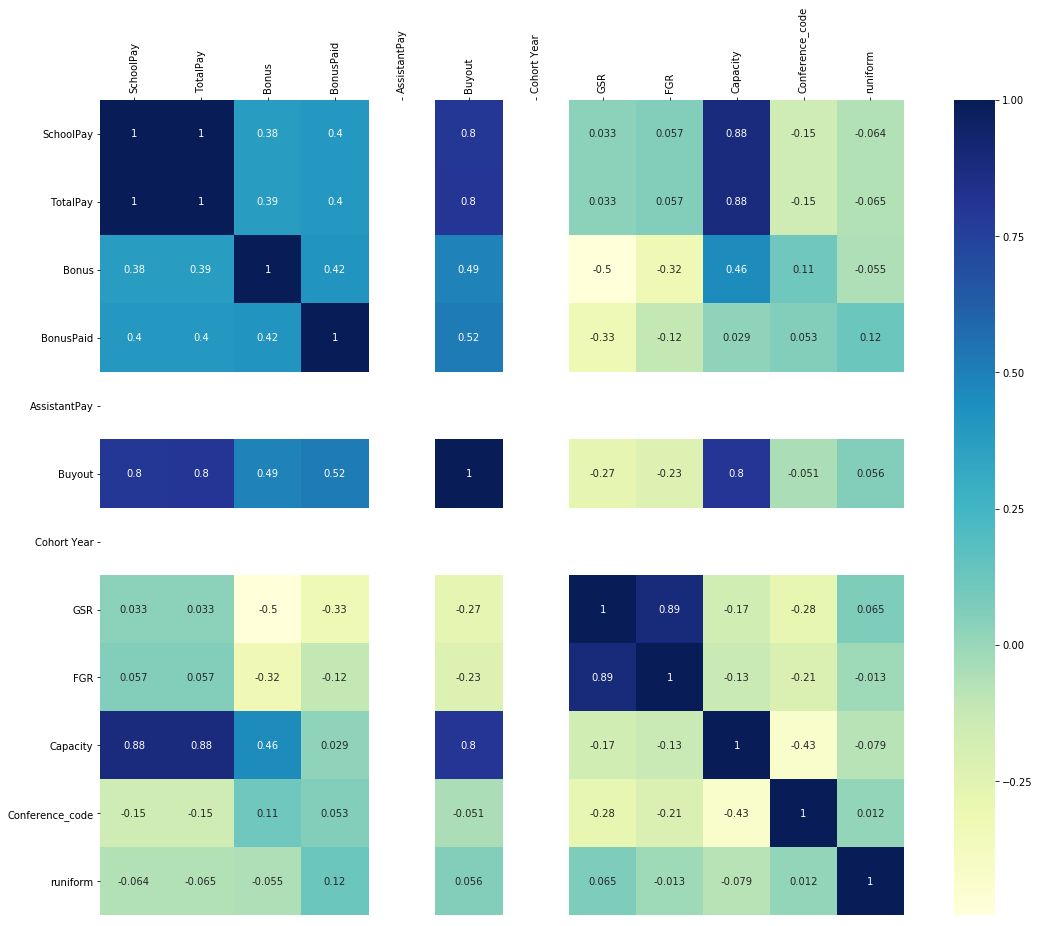

In [0]:
# Plot a correlation heatmap.
plt.subplots(figsize=(18,15))
hm1 = sns.heatmap(data5.corr(), annot=True, cmap='YlGnBu')
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=90)
hm1.xaxis.set_ticks_position('top')

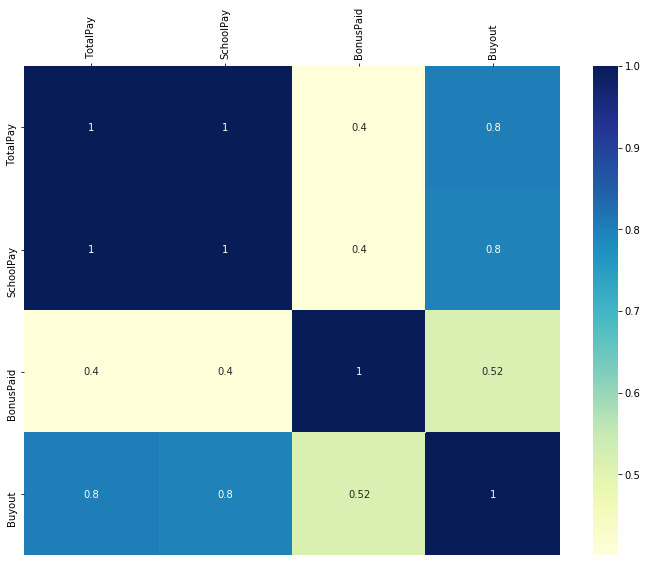

In [0]:
# Plot correlation heatmap of selected numerical features.
plt.subplots(figsize=(12, 9))
hm2 = sns.heatmap(data5[['TotalPay', 'SchoolPay', 'BonusPaid', 'Buyout']].corr(), annot=True, cmap='YlGnBu')
hm2.set_xticklabels(hm2.get_xticklabels(), rotation=90)
hm2.xaxis.set_ticks_position('top')

In [0]:
# Feature selection.
X = data5[['Conference']]
y = data5.iloc[:, 4]

# One-hot encoding.
X = pd.get_dummies(X, columns=['Conference'], drop_first=True)
X_copy = X.copy()

In [0]:
X = X.values

In [0]:
with pd.option_context('display.max_columns', None):
    display(X_copy.head())

,Conference_ACC,Conference_Big 12,Conference_Big Ten,Conference_C-USA,Conference_Ind.,Conference_MAC,Conference_Mt. West,Conference_Pac-12,Conference_SEC,Conference_Sun Belt
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [0]:
# Split the data set to create training and testing sets, and separate the labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [0]:
# List the number of records in each data set.
print('Number of training records: ' + str(X_train.shape[0]))
print('Number of testing records : ' + str(X_test.shape[0]))

Number of training records: 106
Number of testing records : 27


In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
y_train.shape

(106, 1)

In [0]:
# Fitting several regression models to the training set & comparing them.

# Import modules to create models.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,  mean_squared_log_error, explained_variance_score
from numpy import sqrt
from sklearn.model_selection import cross_val_score

# Create regression objects.
lr = LinearRegression()
svr = SVR(kernel = 'linear')
dt = DecisionTreeRegressor(random_state = 0)

y_df = pd.DataFrame({'y_test' : y_test.values})

# Create models and predictions using each method - compare them.
for reg in [lr, svr, dt]:
    
    # Train the model.
    reg.fit(X_train, y_train)
    print(reg)
    print('CV: ' + str(cross_val_score(reg, X, y, cv=10)))
    
    # Predict using test set.
    y_pred = reg.predict(X_test)
    y_pred = sc_y.inverse_transform(y_pred)
    print(y_pred)
    
    y_df[str(reg)[:3]] = pd.DataFrame(y_pred)
    
    # Evaluate variance and MSLE.
    print('Var: ' + str(explained_variance_score(y_test.values, y_pred)))
    print('MSLE: ' + str(mean_squared_log_error(y_test.values, y_pred)) + "\n\n")

print("Test labels:")
print(y_test.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
CV: [0.40673346 0.56148169 0.70004072 0.54849867 0.68083389 0.10046503
 0.54502241 0.57414535 0.73202111 0.43636741]
[[ 624142.85714285]
 [3005546.8       ]
 [4079349.33333333]
 [3391531.        ]
 [1178446.16666667]
 [4420532.36363636]
 [3480287.11111111]
 [1178446.16666667]
 [ 624142.85714285]
 [3480287.11111111]
 [3391531.        ]
 [ 773280.5       ]
 [1178446.16666667]
 [ 624142.85714285]
 [3005546.8       ]
 [ 773280.5       ]
 [ 773280.5       ]
 [3391531.        ]
 [4420532.36363636]
 [3391531.        ]
 [1178446.16666667]
 [3391531.        ]
 [ 730468.53846154]
 [1178446.16666667]
 [3391531.        ]
 [ 773280.5       ]
 [4079349.33333333]]
Var: 0.6182913079567618
MSLE: 0.2043628927413437


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
CV: [-2.65040610e-04 -2.05861465e-02 -4.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Labels of test values.
print(y_test.values)

[ 712500. 2625965. 3800000. 4058061. 2163000. 6070000. 4840717. 2000000.
  600000. 5000000. 2514859. 1550000. 1100000.  825000. 2000000.  885000.
 1650010. 3000000. 2812523. 1831580. 2600000. 5000000. 1425000. 1629000.
 4000000. 1800000. 7504000.]


In [0]:
# Test labels vs predicted values.
display(y_df)

,y_test,Lin,SVR,Dec
0,712500.0,6.241429e+05,6.245539e+05,6.241429e+05
1,2625965.0,3.005547e+06,3.063648e+06,3.005547e+06
2,3800000.0,4.079349e+06,3.936281e+06,4.079349e+06
3,4058061.0,3.391531e+06,2.832833e+06,3.391531e+06
4,2163000.0,1.178446e+06,1.331565e+06,1.178446e+06
5,6070000.0,4.420532e+06,3.686281e+06,4.420532e+06
6,4840717.0,3.480287e+06,3.686876e+06,3.480287e+06
7,2000000.0,1.178446e+06,1.331565e+06,1.178446e+06
8,600000.0,6.241429e+05,6.245539e+05,6.241429e+05
9,5000000.0,3.480287e+06,3.686876e+06,3.480287e+06


In [0]:
# Use grid search to find the best parameters.
# Scoring methods - explained_variance, neg_mean_squared_error.
# Grid search parameters - 'max_features': [1, 2, 3, 4].
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]}, {'min_samples_split' : range(10,100,10), 'max_depth': range(1,20,2)}]
models = [svr, dt]
for i in range(2):
    mod = GridSearchCV(estimator = models[i], param_grid = parameters[i], scoring='neg_mean_squared_error', cv=10, n_jobs=-1, return_train_score=True)
    print(mod.fit(X_train, y_train))
    print('Training MSE: ' + str(abs(mod.best_score_)))
    print('Test MSE: ' + str(abs(mod.score(X_test, sc_y.transform(y_test.values.reshape(-1, 1))))) + "\n\n")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)
Training MSE: 0.39524479839961013
Test MSE: 0.41125970190691485


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_g

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
# Print model cross validation results.
for key in mod.cv_results_.keys():
    print(str(key) + ': \n' + str(mod.cv_results_[key]) + '\n\n')

mean_fit_time: 
[0.00052898 0.00027742 0.00146484 0.00025928 0.00028927 0.00090711
 0.00026624 0.00025668 0.0002599  0.00033212 0.00027943 0.00029132
 0.0002923  0.00028167 0.00030985 0.00029428 0.00033388 0.00028567
 0.00032599 0.00032685 0.00029964 0.00031681 0.00030003 0.00029581
 0.00028455 0.00027676 0.00027061 0.0005137  0.00031142 0.00031662
 0.00085065 0.00031068 0.00029719 0.00029914 0.00027716 0.00030475
 0.00033622 0.00051844 0.0003088  0.0003134  0.00030775 0.00030334
 0.00029113 0.00026975 0.00025811 0.00033083 0.00047743 0.00030842
 0.00030675 0.0003015  0.00029447 0.0002744  0.00030036 0.00097306
 0.0012445  0.00030894 0.00031786 0.00030427 0.00036464 0.00028925
 0.00026231 0.00028179 0.00025597 0.00031273 0.00031476 0.00032175
 0.00029883 0.00029831 0.00030205 0.00028014 0.00029001 0.0002749
 0.00032763 0.00030718 0.0003171  0.00030365 0.00029478 0.0002908
 0.00027587 0.00019391 0.0001663  0.00020957 0.00019906 0.00021005
 0.00019865 0.00019083 0.00018928 0.00018468 0.0

In [0]:
# Find the best estimator.
print(mod.best_estimator_)
print('Training MSE: ' + str(abs(mod.best_score_)))

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Training MSE: 0.3944098249674579


In [0]:
# Predict on test set.
results = mod.predict(X_test)
sc_y.inverse_transform(results.reshape(1, -1))

array([[ 624142.85714286, 3005546.8       , 4079349.33333333,
        3391531.        ,  838851.27272727, 4420532.36363636,
        3480287.11111111,  838851.27272727,  624142.85714286,
        3480287.11111111, 3391531.        ,  838851.27272727,
         838851.27272727,  624142.85714286, 3005546.8       ,
         838851.27272727,  838851.27272727, 3391531.        ,
        4420532.36363636, 3391531.        ,  838851.27272727,
        3391531.        ,  838851.27272727,  838851.27272727,
        3391531.        ,  838851.27272727, 4079349.33333333]])

In [0]:
# Mean squared error of test set.
print('Train MSE: ' + str(abs(mod.score(X_test, sc_y.transform(y_test.values.reshape(-1, 1))))))

Train MSE: 0.41337100439547025
